<a href="https://colab.research.google.com/github/Nikhil14091997/ML-ZoomCamp/blob/main/HW-Week-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv


--2021-10-20 09:48:45--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  --.-KB/s    in 0.07s   

2021-10-20 09:48:45 (96.8 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [3]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]
df = df[columns]
df.head()

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,Brooklyn,Private room,40.64749,-73.97237,1,9,0.21,6,365,149
1,Manhattan,Entire home/apt,40.75362,-73.98377,1,45,0.38,2,355,225
2,Manhattan,Private room,40.80902,-73.94190,3,0,NaN,1,365,150
3,Brooklyn,Entire home/apt,40.68514,-73.95976,1,270,4.64,1,194,89
4,Manhattan,Entire home/apt,40.79851,-73.94399,10,9,0.10,1,0,80


Fill NAs with 0

In [5]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [6]:
df['reviews_per_month'] = df.reviews_per_month.fillna(0)

In [7]:
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

Apply the log tranform to price

In [8]:
df.price.head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [9]:
df.price = np.log1p(df['price'])

In [10]:
df.price.head()

0    5.010635
1    5.420535
2    5.017280
3    4.499810
4    4.394449
Name: price, dtype: float64

Do train/validation/test split with 60%/20%/20% distribution.

In [11]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, random_state = 1, test_size = 0.20)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [12]:
print(len(df))
print(len(df_train))
print(len(df_val))
print(len(df_test))

48895
29337
9779
9779


In [13]:
y_train = df_train.price.values
y_test = df_test.price.values
y_val = df_val.price.values

In [14]:
del df_train['price']
del df_test['price']
del df_val['price']

In [15]:
df_train.head()

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
385,Queens,Entire home/apt,40.76434,-73.92132,4,30,0.32,1,363
33147,Brooklyn,Private room,40.73442,-73.95854,5,2,0.16,1,0
33881,Brooklyn,Entire home/apt,40.66359,-73.99487,1,33,2.75,5,113
37208,Brooklyn,Private room,40.63766,-74.02626,3,1,0.12,2,362
7485,Brooklyn,Private room,40.65118,-74.00842,2,0,0.00,2,365


In [16]:
y_train[:5]

array([4.7095302 , 4.26267988, 6.13339804, 4.60517019, 7.60140233])

# Question 1


```
Let's train a decision tree regressor to predict the price variable.

Train a model with max_depth=1


```



In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [21]:
train_dicts = df_train.to_dict(orient='records')

In [22]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)


In [23]:
dt = DecisionTreeRegressor(max_depth=1)

In [24]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]





```
Which feature is used for splitting the data?

room_type
neighbourhood_group
number_of_reviews
reviews_per_month


Answer : room_type
```




# Question 2
```


Train a random forest model with these parameters:

n_estimators=10
random_state=1
n_jobs=-1 (optional - to make training faster)
```



In [28]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
dt2 = RandomForestRegressor(n_estimators=10,
                            random_state=1,
                            n_jobs=-1)

In [31]:
dt2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [38]:
from sklearn.metrics import mean_squared_error
import math

In [33]:
pred_val = dt2.predict(X_val)
rmse = math.sqrt(mean_squared_error(y_val, pred_val))
print(round(rmse, 3))

0.461




```

What's the RMSE of this model on validation?

0.059
0.259
0.459
0.659

Answer : 0.459
```



# Question 3


```
Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10
Set random_state to 1
Evaluate the model on the validation dataset
```



In [41]:
scores = []
for n in range(10, 201, 10):
  dt3= RandomForestRegressor(n_estimators = n, random_state = 1, n_jobs = -1)
  dt3.fit(X_train, y_train)
  pred = dt3.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val,pred))
  scores.append((n, rmse))
  print("For n_estimator -> ", n, " RMSE is -> ", rmse)

For n_estimator ->  10  RMSE is ->  0.460888788095762
For n_estimator ->  20  RMSE is ->  0.44744055425901735
For n_estimator ->  30  RMSE is ->  0.44440015830200136
For n_estimator ->  40  RMSE is ->  0.44281711871165336
For n_estimator ->  50  RMSE is ->  0.44176815762157207
For n_estimator ->  60  RMSE is ->  0.44125165338475053
For n_estimator ->  70  RMSE is ->  0.44064455072014125
For n_estimator ->  80  RMSE is ->  0.440740830263047
For n_estimator ->  90  RMSE is ->  0.4402749020311618
For n_estimator ->  100  RMSE is ->  0.4397631903425602
For n_estimator ->  110  RMSE is ->  0.4393128261208466
For n_estimator ->  120  RMSE is ->  0.43912990819267467
For n_estimator ->  130  RMSE is ->  0.4392796575512702
For n_estimator ->  140  RMSE is ->  0.4391514983746916
For n_estimator ->  150  RMSE is ->  0.43902892484355854
For n_estimator ->  160  RMSE is ->  0.4388423640549406
For n_estimator ->  170  RMSE is ->  0.4387460509023033
For n_estimator ->  180  RMSE is ->  0.438852894822

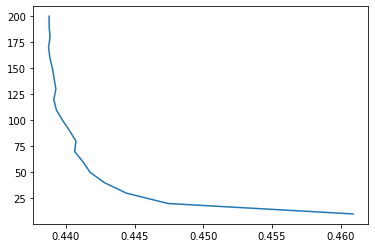

In [43]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

plt.plot(df_scores.rmse, df_scores.n_estimators)



```

After which value of n_estimators does RMSE stop improving?

10
50
70
120

Answer : 120
```



# Question 4


```
Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]
For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
Fix the random seed: random_state=1

```



In [44]:
scores4 = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
      rfr = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1,
                                    n_jobs = -1)
      rfr.fit(X_train, y_train)
      prediction = rfr.predict(X_val)
      rmse = math.sqrt(mean_squared_error(y_val,prediction))
      scores4.append((d, n, rmse))


In [47]:
q4Scores = pd.DataFrame(scores4, columns = ['max_depth', 'n_estimators', 'rmse'])



In [50]:
q4ScoresPivot = q4Scores.pivot_table(index = ['n_estimators'], columns = ['max_depth'], values = ['rmse'])
print(q4ScoresPivot.round(3))

               rmse                     
max_depth        10     15     20     25
n_estimators                            
10            0.445  0.450  0.459  0.461
20            0.442  0.441  0.446  0.448
30            0.441  0.440  0.444  0.445
40            0.441  0.439  0.442  0.443
50            0.441  0.438  0.441  0.442
60            0.441  0.438  0.440  0.441
70            0.441  0.437  0.440  0.441
80            0.441  0.437  0.440  0.441
90            0.440  0.437  0.439  0.440
100           0.440  0.436  0.439  0.440
110           0.440  0.436  0.438  0.439
120           0.440  0.436  0.438  0.439
130           0.440  0.436  0.438  0.439
140           0.440  0.436  0.438  0.439
150           0.440  0.436  0.438  0.439
160           0.440  0.436  0.438  0.439
170           0.440  0.436  0.438  0.439
180           0.440  0.436  0.438  0.439
190           0.440  0.436  0.438  0.439
200           0.440  0.436  0.438  0.439


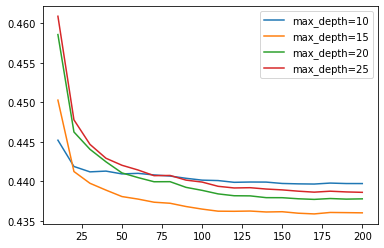

In [49]:
for d in [10, 15, 20, 25]:
    df_subset = q4Scores[q4Scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()



```
What's the best max_depth:

10
15
20
25

Answer : 15
```



# Question 5


```
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parametes:
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)
Get the feature importance information from this model
```



In [39]:
dt5 = RandomForestRegressor(n_estimators = 10, max_depth = 20, random_state = 1, n_jobs = -1)
dt5.fit(X_train, y_train)
important = dt5.feature_importances_
df_important = pd.DataFrame(important, index = dv.feature_names_)

In [40]:
print(df_important)

                                          0
availability_365                   0.076516
calculated_host_listings_count     0.030906
latitude                           0.152054
longitude                          0.153219
minimum_nights                     0.053645
neighbourhood_group=Bronx          0.000284
neighbourhood_group=Brooklyn       0.001166
neighbourhood_group=Manhattan      0.034017
neighbourhood_group=Queens         0.001153
neighbourhood_group=Staten Island  0.000118
number_of_reviews                  0.043525
reviews_per_month                  0.052438
room_type=Entire home/apt          0.391897
room_type=Private room             0.004521
room_type=Shared room              0.004541




```

What's the most important feature?

neighbourhood_group=Manhattan
room_type=Entire home/apt
longitude
latitude

Answer : room_type=Entire home/apt 
with importance of :  0.391897
```



# Question 6


```
Now let's train an XGBoost model! For this question, we'll tune the eta parameter

Install XGBoost
Create DMatrix for train and validation
Create a watchlist
Train a model with these parameters for 100 rounds:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
```



In [63]:
!pip install xgboost

In [64]:

import xgboost as xgb

In [65]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [66]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [67]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [68]:
scores = {}



In [69]:
%%capture output
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [70]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [71]:
xgb_params["eta"] = 0.1

In [72]:

%%capture output
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [73]:
key = f'eta={xgb_params["eta"]}'
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [74]:
xgb_params["eta"] = 0.01

In [75]:
%%capture output
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [76]:
key = f'eta={xgb_params["eta"]}'
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [77]:
df_score = parse_xgb_output(output)

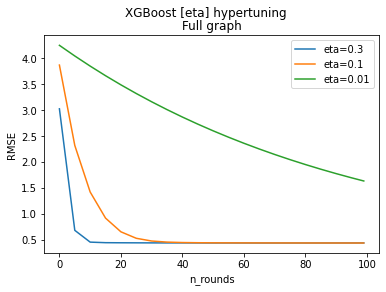

In [78]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

    plt.xlabel('n_rounds')
    plt.ylabel('RMSE')
    plt.legend()
    plt.title('Full graph')

plt.suptitle(f'XGBoost [eta] hypertuning');



```
Which eta leads to the best RMSE score on the validation dataset?

0.3
0.1
0.01

ANswer : 0.1

```

